In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("../Data/process/8#Belt Conveyer_merged.csv")

In [3]:
df.describe()

,High-Frequency Acceleration_mean,High-Frequency Acceleration_min,High-Frequency Acceleration_max,High-Frequency Acceleration_median,High-Frequency Acceleration_std,Low-Frequency Acceleration Z_mean,Low-Frequency Acceleration Z_min,Low-Frequency Acceleration Z_max,Low-Frequency Acceleration Z_median,Low-Frequency Acceleration Z_std,...,crest_factor,electromagnetic_status,fit_condition,kurtosis_opt,peak_value_opt,rms_10_25khz,rms_1_10khz,rotor_balance_status,rubbing_condition,velocity_rms
count,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,...,715.000000,715.0,715.000000,715.000000,715.000000,715.0,715.000000,715.000000,715.000000,715.000000
mean,2.320366,1.501320,3.354875,2.332738,0.506941,2.072488,1.410500,3.063061,2.071502,0.391595,...,91.070951,98.0,88.415259,86.325664,91.090140,98.0,96.956545,84.863469,97.705594,68.410434
std,0.107521,0.123826,0.390366,0.187818,0.037506,0.107069,0.123833,0.443924,0.126194,0.043275,...,0.844172,0.0,2.469648,0.821938,0.682508,0.0,0.118365,2.357457,0.650879,2.600310
min,1.825365,0.039000,2.662220,2.010520,0.413868,1.627287,0.016090,2.271960,1.754550,0.323076,...,88.100000,98.0,80.330000,82.880000,88.150000,98.0,96.720000,80.030000,94.610000,62.650000
25%,2.263811,1.470710,3.109865,2.186578,0.483403,2.021259,1.374770,2.710595,1.986765,0.363487,...,90.605000,98.0,87.615000,86.055000,90.665000,98.0,96.870000,83.245000,97.410000,66.710000
50%,2.324199,1.522560,3.231230,2.264695,0.506522,2.085821,1.431120,2.934670,2.078490,0.383195,...,91.270000,98.0,89.130000,86.590000,91.140000,98.0,96.930000,84.920000,97.840000,68.200000
75%,2.400221,1.556340,3.582770,2.485880,0.529902,2.139133,1.467535,3.423510,2.158955,0.413244,...,91.670000,98.0,90.040000,86.880000,91.530000,98.0,97.020000,86.775000,98.110000,69.790000
max,2.547862,1.702940,7.370280,2.755975,0.909620,2.379039,1.637260,5.721360,2.501430,0.792056,...,92.760000,98.0,95.020000,87.660000,93.410000,98.0,97.420000,94.770000,98.950000,77.250000


In [4]:
df.isna().any().sum()

np.int64(0)

In [5]:
   # Separate Input Features (X) and Target Features (y)
input_features = [
    'High-Frequency Acceleration_mean', 'High-Frequency Acceleration_min',
    'High-Frequency Acceleration_max', 'High-Frequency Acceleration_median',
    'High-Frequency Acceleration_std', 'Low-Frequency Acceleration Z_mean',
    'Low-Frequency Acceleration Z_min', 'Low-Frequency Acceleration Z_max',
    'Low-Frequency Acceleration Z_median', 'Low-Frequency Acceleration Z_std',
    'Temperature_mean', 'Temperature_min', 'Temperature_max', 'Temperature_median',
    'Temperature_std', 'Vibration Velocity Z_mean', 'Vibration Velocity Z_min',
    'Vibration Velocity Z_max', 'Vibration Velocity Z_median', 'Vibration Velocity Z_std'
]


target_features = [
    'alignment_status', 'bearing_lubrication', 'crest_factor',
    'electromagnetic_status', 'fit_condition', 'kurtosis_opt',
    'rms_10_25khz', 'rms_1_10khz', 'rotor_balance_status',
    'rubbing_condition', 'velocity_rms', 'peak_value_opt'
]

X = df[input_features]
y = df[target_features]

### Conveyor Belt Correlation Plot

In [6]:
correlation_matrix = df[input_features + target_features].corr()
print(correlation_matrix)

                                     High-Frequency Acceleration_mean  \
High-Frequency Acceleration_mean                             1.000000   
High-Frequency Acceleration_min                              0.650985   
High-Frequency Acceleration_max                              0.595735   
High-Frequency Acceleration_median                           0.808905   
High-Frequency Acceleration_std                              0.280453   
Low-Frequency Acceleration Z_mean                            0.884505   
Low-Frequency Acceleration Z_min                             0.676408   
Low-Frequency Acceleration Z_max                             0.577559   
Low-Frequency Acceleration Z_median                          0.881745   
Low-Frequency Acceleration Z_std                             0.223229   
Temperature_mean                                             0.496440   
Temperature_min                                              0.473092   
Temperature_max                                    

<Axes: >

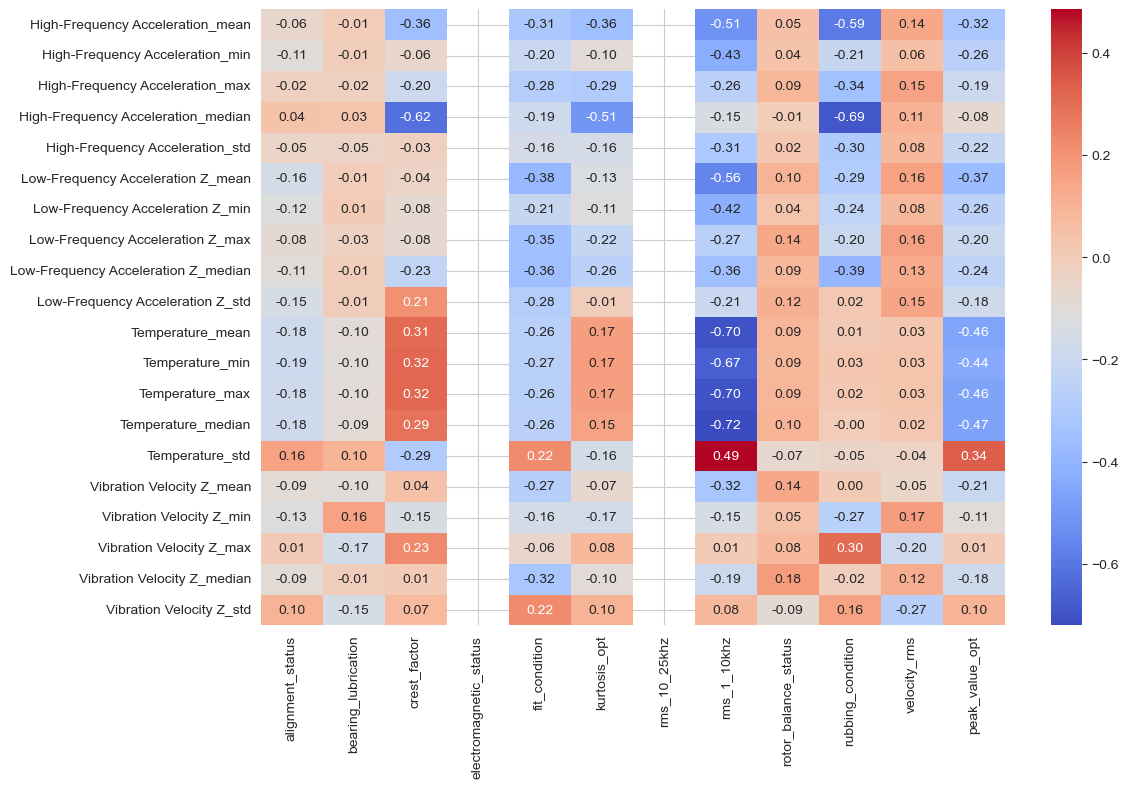

In [7]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix.loc[input_features, target_features],
    annot=True, fmt=".2f", cmap="coolwarm", cbar=True
)

In [8]:
correlation_matrix = df[input_features].corr()
print(correlation_matrix)

                                     High-Frequency Acceleration_mean  \
High-Frequency Acceleration_mean                             1.000000   
High-Frequency Acceleration_min                              0.650985   
High-Frequency Acceleration_max                              0.595735   
High-Frequency Acceleration_median                           0.808905   
High-Frequency Acceleration_std                              0.280453   
Low-Frequency Acceleration Z_mean                            0.884505   
Low-Frequency Acceleration Z_min                             0.676408   
Low-Frequency Acceleration Z_max                             0.577559   
Low-Frequency Acceleration Z_median                          0.881745   
Low-Frequency Acceleration Z_std                             0.223229   
Temperature_mean                                             0.496440   
Temperature_min                                              0.473092   
Temperature_max                                    

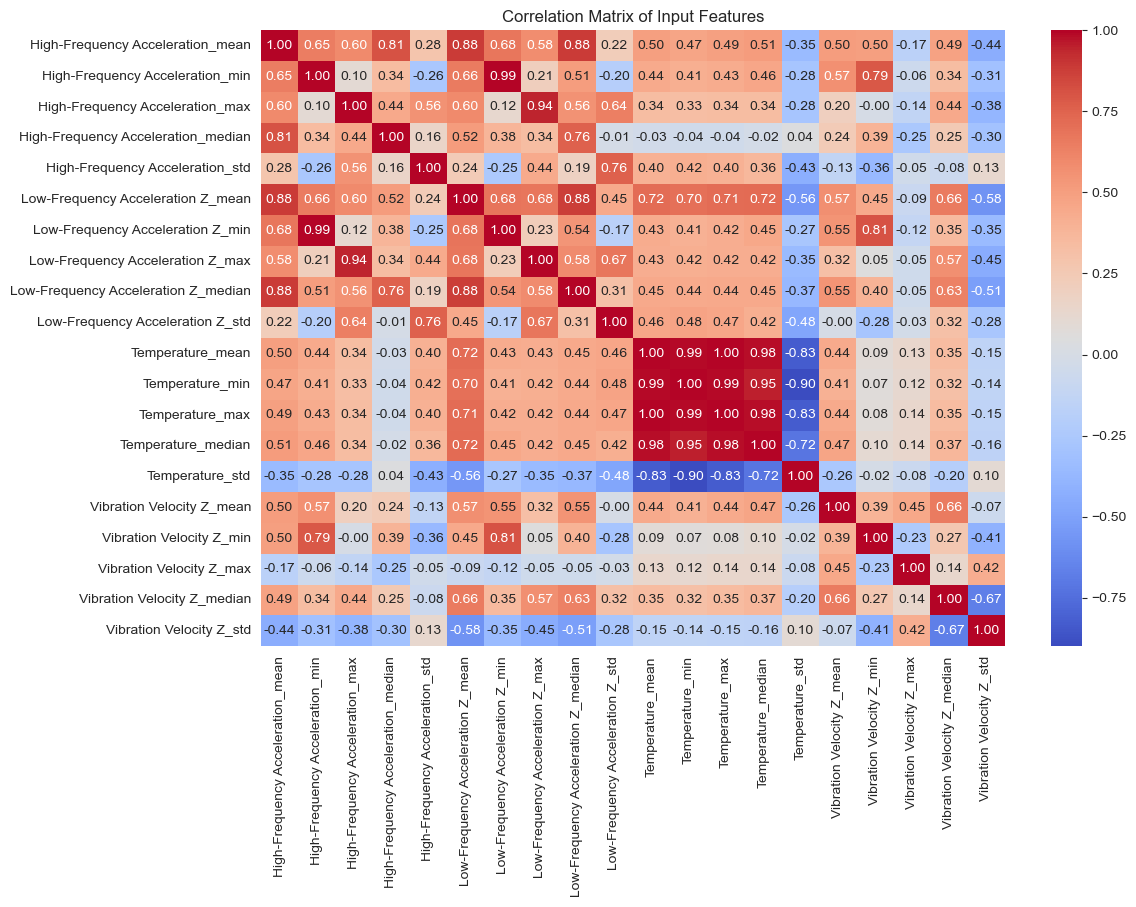

In [9]:
# Compute the correlation matrix for input features
# correlation_matrix = df[input_features].corr()

# Plot heatmap for input feature correlation



plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True, fmt=".2f", cmap="coolwarm", cbar=True
)
plt.title("Correlation Matrix of Input Features")
plt.show()

In [10]:
import pandas as pd

def remove_multicollinear_features(df, threshold=0.8):
    # Compute correlation matrix
    corr_matrix = df.corr().abs()

    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(
        np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
    )

    # Find index of features with correlation greater than threshold
    to_drop = [
        column for column in upper.columns
        if any(upper[column] > threshold)
    ]

    # Drop features
    df_reduced = df.drop(columns=to_drop)
    return df_reduced, to_drop

# Use the function
input_features, dropped_features = remove_multicollinear_features(df[input_features], threshold=0.8)
input_features = input_features.columns
print("Removed features:", dropped_features)

Removed features: ['High-Frequency Acceleration_median', 'Low-Frequency Acceleration Z_mean', 'Low-Frequency Acceleration Z_min', 'Low-Frequency Acceleration Z_max', 'Low-Frequency Acceleration Z_median', 'Temperature_min', 'Temperature_max', 'Temperature_median', 'Temperature_std', 'Vibration Velocity Z_min']


In [11]:
# input_features = [
#     'High-Frequency Acceleration_mean', 'High-Frequency Acceleration_min',
#     'High-Frequency Acceleration_max', 'High-Frequency Acceleration_median',
#     'High-Frequency Acceleration_std', 'Low-Frequency Acceleration Z_mean',
#     'Low-Frequency Acceleration Z_median', 'Low-Frequency Acceleration Z_std',
#     'Temperature_mean',
#     'Vibration Velocity Z_max', 'Vibration Velocity Z_median', 'Vibration Velocity Z_std'
# ]

# input_features = [
#     'High-Frequency Acceleration_mean',
#     'High-Frequency Acceleration_std',
#     'Low-Frequency Acceleration Z_mean',
#     'Low-Frequency Acceleration Z_std',
#     'Temperature_mean',
#     'Vibration Velocity Z_mean',
#     'Vibration Velocity Z_std'
# ]


correlation_matrix = df[input_features].corr()
print(correlation_matrix)

                                  High-Frequency Acceleration_mean  \
High-Frequency Acceleration_mean                          1.000000   
High-Frequency Acceleration_min                           0.650985   
High-Frequency Acceleration_max                           0.595735   
High-Frequency Acceleration_std                           0.280453   
Low-Frequency Acceleration Z_std                          0.223229   
Temperature_mean                                          0.496440   
Vibration Velocity Z_mean                                 0.504740   
Vibration Velocity Z_max                                 -0.171472   
Vibration Velocity Z_median                               0.487018   
Vibration Velocity Z_std                                 -0.437735   

                                  High-Frequency Acceleration_min  \
High-Frequency Acceleration_mean                         0.650985   
High-Frequency Acceleration_min                          1.000000   
High-Frequency Acceler

In [2]:
# plt.figure(figsize=(12, 8))
# sns.heatmap(
#     correlation_matrix,
#     annot=True, fmt=".2f", cmap="coolwarm", cbar=True
# )
# plt.title("Correlation Matrix of Input Features")
# plt.show()

In [13]:
X = df[input_features]
y = df[target_features]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
scalar = StandardScaler()

X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

#### Baseline Model

## Interpretable Models

#### Conveyor Belt

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define a unified pipeline function
def train_and_evaluate_model(model, param_grid, X_train, X_test, y_train, y_test, target_features, tune_hyperparameters=True):
    """
    Trains and evaluates a model for multiple target features.

    Parameters:
        model: The base model to be trained (e.g., LinearRegression, Ridge, etc.)
        param_grid: The hyperparameter grid for tuning (set to None if no tuning needed).
        X_train: Scaled training data.
        X_test: Scaled testing data.
        y_train: Training target values (dataframe with target features as columns).
        y_test: Testing target values (dataframe with target features as columns).
        target_features: List of target feature names.
        tune_hyperparameters: If True, perform GridSearchCV for hyperparameter tuning.

    Returns:
        Dictionary containing model results for each target feature.
    """
    results = {}

    for target in target_features:
        print(f"\nTraining model for target: {target}")

        if tune_hyperparameters and param_grid:
            # Perform hyperparameter tuning
            grid_search = GridSearchCV(model, param_grid, cv=5, scoring="neg_mean_squared_error", verbose=0)
            grid_search.fit(X_train, y_train[target])
            best_model = grid_search.best_estimator_
            best_params = grid_search.best_params_
        else:
            # Train without hyperparameter tuning
            best_model = model
            best_model.fit(X_train, y_train[target])
            best_params = None

        # Make predictions
        y_train_pred = best_model.predict(X_train)
        y_test_pred = best_model.predict(X_test)

        # Evaluate performance
        train_rmse = np.sqrt(mean_squared_error(y_train[target], y_train_pred))
        test_rmse = np.sqrt(mean_squared_error(y_test[target], y_test_pred))
        train_r2 = r2_score(y_train[target], y_train_pred)
        test_r2 = r2_score(y_test[target], y_test_pred)

        # Save results
        results[target] = {
            "Best Params": best_params,
            "Train RMSE": train_rmse,
            "Test RMSE": test_rmse,
            "Train R²": train_r2,
            "Test R²": test_r2,
        }

        # Print performance metrics
        print(f"Target: {target} | Train RMSE: {train_rmse:.4f} | Test RMSE: {test_rmse:.4f} | Train R²: {train_r2:.4f} | Test R²: {test_r2:.4f}")
        if best_params:
            print(f"Best Params: {best_params}")

    return results

In [17]:
from sklearn.linear_model import LinearRegression

linear_results = train_and_evaluate_model(
    model=LinearRegression(),
    param_grid=None,  # No hyperparameter grid for Linear Regression
    X_train=X_train_scaled,
    X_test=X_test_scaled,
    y_train=y_train,
    y_test=y_test,
    target_features=target_features,
    tune_hyperparameters=False
)


Training model for target: alignment_status
Target: alignment_status | Train RMSE: 3.1245 | Test RMSE: 3.4317 | Train R²: 0.0806 | Test R²: 0.0504

Training model for target: bearing_lubrication
Target: bearing_lubrication | Train RMSE: 0.2841 | Test RMSE: 0.2884 | Train R²: 0.0599 | Test R²: 0.0721

Training model for target: crest_factor
Target: crest_factor | Train RMSE: 0.5780 | Test RMSE: 0.5899 | Train R²: 0.5181 | Test R²: 0.5542

Training model for target: electromagnetic_status
Target: electromagnetic_status | Train RMSE: 0.0000 | Test RMSE: 0.0000 | Train R²: 1.0000 | Test R²: 1.0000

Training model for target: fit_condition
Target: fit_condition | Train RMSE: 2.1762 | Test RMSE: 2.4525 | Train R²: 0.2152 | Test R²: 0.0473

Training model for target: kurtosis_opt
Target: kurtosis_opt | Train RMSE: 0.6524 | Test RMSE: 0.7216 | Train R²: 0.3430 | Test R²: 0.3312

Training model for target: rms_10_25khz
Target: rms_10_25khz | Train RMSE: 0.0000 | Test RMSE: 0.0000 | Train R²: 1

In [18]:
from sklearn.linear_model import Ridge

ridge_param_grid = {"alpha": [0.01, 0.1, 1, 10, 100]}
ridge_results = train_and_evaluate_model(
    model=Ridge(),
    param_grid=ridge_param_grid,
    X_train=X_train_scaled,
    X_test=X_test_scaled,
    y_train=y_train,
    y_test=y_test,
    target_features=target_features,
    tune_hyperparameters=True
)


Training model for target: alignment_status
Target: alignment_status | Train RMSE: 3.1257 | Test RMSE: 3.4365 | Train R²: 0.0799 | Test R²: 0.0477
Best Params: {'alpha': 10}

Training model for target: bearing_lubrication
Target: bearing_lubrication | Train RMSE: 0.2859 | Test RMSE: 0.2915 | Train R²: 0.0478 | Test R²: 0.0519
Best Params: {'alpha': 100}

Training model for target: crest_factor
Target: crest_factor | Train RMSE: 0.5780 | Test RMSE: 0.5899 | Train R²: 0.5181 | Test R²: 0.5542
Best Params: {'alpha': 0.01}

Training model for target: electromagnetic_status
Target: electromagnetic_status | Train RMSE: 0.0000 | Test RMSE: 0.0000 | Train R²: 1.0000 | Test R²: 1.0000
Best Params: {'alpha': 0.01}

Training model for target: fit_condition
Target: fit_condition | Train RMSE: 2.1768 | Test RMSE: 2.4442 | Train R²: 0.2148 | Test R²: 0.0538
Best Params: {'alpha': 10}

Training model for target: kurtosis_opt
Target: kurtosis_opt | Train RMSE: 0.6528 | Test RMSE: 0.7239 | Train R²: 0

In [19]:
from sklearn.tree import DecisionTreeRegressor

tree_param_grid = {
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5]
}
tree_results = train_and_evaluate_model(
    model=DecisionTreeRegressor(random_state=42),
    param_grid=tree_param_grid,
    X_train=X_train_scaled,
    X_test=X_test_scaled,
    y_train=y_train,
    y_test=y_test,
    target_features=target_features,
    tune_hyperparameters=True
)


Training model for target: alignment_status
Target: alignment_status | Train RMSE: 3.0682 | Test RMSE: 3.3781 | Train R²: 0.1135 | Test R²: 0.0798
Best Params: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}

Training model for target: bearing_lubrication
Target: bearing_lubrication | Train RMSE: 0.2757 | Test RMSE: 0.2992 | Train R²: 0.1142 | Test R²: 0.0014
Best Params: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}

Training model for target: crest_factor
Target: crest_factor | Train RMSE: 0.5952 | Test RMSE: 0.7112 | Train R²: 0.4889 | Test R²: 0.3520
Best Params: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}

Training model for target: electromagnetic_status
Target: electromagnetic_status | Train RMSE: 0.0000 | Test RMSE: 0.0000 | Train R²: 1.0000 | Test R²: 1.0000
Best Params: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}

Training model for target: fit_condition
Target: fit_condition | Train RMSE: 2.0993 | Tes

In [20]:
from sklearn.ensemble import RandomForestRegressor

rf_param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [5, 10, 15, None],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}
rf_results = train_and_evaluate_model(
    model=RandomForestRegressor(random_state=42),
    param_grid=rf_param_grid,
    X_train=X_train_scaled,
    X_test=X_test_scaled,
    y_train=y_train,
    y_test=y_test,
    target_features=target_features,
    tune_hyperparameters=True
)


Training model for target: alignment_status
Target: alignment_status | Train RMSE: 2.6703 | Test RMSE: 3.3585 | Train R²: 0.3285 | Test R²: 0.0905
Best Params: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}

Training model for target: bearing_lubrication
Target: bearing_lubrication | Train RMSE: 0.2372 | Test RMSE: 0.2893 | Train R²: 0.3446 | Test R²: 0.0662
Best Params: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}

Training model for target: crest_factor
Target: crest_factor | Train RMSE: 0.4875 | Test RMSE: 0.6678 | Train R²: 0.6571 | Test R²: 0.4287
Best Params: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}

Training model for target: electromagnetic_status
Target: electromagnetic_status | Train RMSE: 0.0000 | Test RMSE: 0.0000 | Train R²: 1.0000 | Test R²: 1.0000
Best Params: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

Traini

In [21]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_param_grid = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5, 7]
}
gbr_results = train_and_evaluate_model(
    model=GradientBoostingRegressor(random_state=42),
    param_grid=gbr_param_grid,
    X_train=X_train_scaled,
    X_test=X_test_scaled,
    y_train=y_train,
    y_test=y_test,
    target_features=target_features,
    tune_hyperparameters=True
)


Training model for target: alignment_status
Target: alignment_status | Train RMSE: 3.0093 | Test RMSE: 3.3978 | Train R²: 0.1472 | Test R²: 0.0691
Best Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}

Training model for target: bearing_lubrication
Target: bearing_lubrication | Train RMSE: 0.2702 | Test RMSE: 0.2931 | Train R²: 0.1492 | Test R²: 0.0417
Best Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}

Training model for target: crest_factor
Target: crest_factor | Train RMSE: 0.4559 | Test RMSE: 0.6548 | Train R²: 0.7001 | Test R²: 0.4509
Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

Training model for target: electromagnetic_status
Target: electromagnetic_status | Train RMSE: 0.0000 | Test RMSE: 0.0000 | Train R²: 1.0000 | Test R²: 1.0000
Best Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}

Training model for target: fit_condition
Target: fit_condition | Train RMSE: 1.6334 | Test RMSE: 2.4057 

In [22]:
from xgboost import XGBRegressor

xgb_param_grid = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5, 7]
}
xgb_results = train_and_evaluate_model(
    model=XGBRegressor(random_state=42),
    param_grid=xgb_param_grid,
    X_train=X_train_scaled,
    X_test=X_test_scaled,
    y_train=y_train,
    y_test=y_test,
    target_features=target_features,
    tune_hyperparameters=True
)


Training model for target: alignment_status
Target: alignment_status | Train RMSE: 3.1253 | Test RMSE: 3.4470 | Train R²: 0.0801 | Test R²: 0.0419
Best Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}

Training model for target: bearing_lubrication
Target: bearing_lubrication | Train RMSE: 0.2447 | Test RMSE: 0.2916 | Train R²: 0.3025 | Test R²: 0.0514
Best Params: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 50}

Training model for target: crest_factor
Target: crest_factor | Train RMSE: 0.4698 | Test RMSE: 0.6620 | Train R²: 0.6816 | Test R²: 0.4387
Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

Training model for target: electromagnetic_status
Target: electromagnetic_status | Train RMSE: 0.0000 | Test RMSE: 0.0000 | Train R²: 1.0000 | Test R²: 1.0000
Best Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}

Training model for target: fit_condition
Target: fit_condition | Train RMSE: 1.3062 | Test RMSE: 2.4789 | 

In [23]:
from sklearn.svm import SVR

svr_param_grid = {
    "kernel": ["linear", "rbf"],
    "C": [0.1, 1, 10],
    "epsilon": [0.01, 0.1, 0.2]
}
svr_results = train_and_evaluate_model(
    model=SVR(),
    param_grid=svr_param_grid,
    X_train=X_train_scaled,
    X_test=X_test_scaled,
    y_train=y_train,
    y_test=y_test,
    target_features=target_features,
    tune_hyperparameters=True
)


Training model for target: alignment_status
Target: alignment_status | Train RMSE: 3.1839 | Test RMSE: 3.4579 | Train R²: 0.0453 | Test R²: 0.0358
Best Params: {'C': 0.1, 'epsilon': 0.2, 'kernel': 'linear'}

Training model for target: bearing_lubrication
Target: bearing_lubrication | Train RMSE: 0.2476 | Test RMSE: 0.3013 | Train R²: 0.2859 | Test R²: -0.0127
Best Params: {'C': 1, 'epsilon': 0.2, 'kernel': 'rbf'}

Training model for target: crest_factor
Target: crest_factor | Train RMSE: 0.5804 | Test RMSE: 0.5889 | Train R²: 0.5140 | Test R²: 0.5558
Best Params: {'C': 10, 'epsilon': 0.2, 'kernel': 'linear'}

Training model for target: electromagnetic_status
Target: electromagnetic_status | Train RMSE: 0.0000 | Test RMSE: 0.0000 | Train R²: 1.0000 | Test R²: 1.0000
Best Params: {'C': 0.1, 'epsilon': 0.01, 'kernel': 'linear'}

Training model for target: fit_condition
Target: fit_condition | Train RMSE: 1.8587 | Test RMSE: 2.5228 | Train R²: 0.4275 | Test R²: -0.0080
Best Params: {'C': 

In [24]:
import pandas as pd

# Example: Collect results from multiple models
all_results = {
    "Linear Regression": linear_results,
    "Ridge Regression": ridge_results,
    "Decision Tree": tree_results,
    "Random Forest": rf_results,
    "Gradient Boosting": gbr_results,
    "XGBoost": xgb_results,
    "SVR": svr_results
}

# Convert each model's results into a DataFrame
comparison_df = pd.DataFrame({
    model_name: {target: metrics["Test RMSE"] for target, metrics in results.items()}
    for model_name, results in all_results.items()
})

# Display the comparison
print("\nComparison of Test RMSE Across Models:")
print(comparison_df)


Comparison of Test RMSE Across Models:
                        Linear Regression  Ridge Regression  Decision Tree  \
alignment_status                 3.431730          3.436470       3.378050   
bearing_lubrication              0.288374          0.291495       0.299153   
crest_factor                     0.589935          0.589938       0.711244   
electromagnetic_status           0.000000          0.000000       0.000000   
fit_condition                    2.452508          2.444167       2.487206   
kurtosis_opt                     0.721616          0.723946       0.797918   
rms_10_25khz                     0.000000          0.000000       0.000000   
rms_1_10khz                      0.087383          0.087305       0.095420   
rotor_balance_status             2.418119          2.395281       2.551814   
rubbing_condition                0.383847          0.383578       0.495828   
velocity_rms                     2.452270          2.425215       2.443704   
peak_value_opt          

#### High Temp Fun

In [15]:
df1 = pd.read_csv("../Data/process/1#High-Temp Fan_merged.csv")

In [16]:
df1.describe()

,High-Frequency Acceleration_mean,High-Frequency Acceleration_min,High-Frequency Acceleration_max,High-Frequency Acceleration_median,High-Frequency Acceleration_std,Low-Frequency Acceleration Z_mean,Low-Frequency Acceleration Z_min,Low-Frequency Acceleration Z_max,Low-Frequency Acceleration Z_median,Low-Frequency Acceleration Z_std,...,bearing_lubrication,crest_factor,electromagnetic_status,fit_condition,kurtosis_opt,rms_10_25khz,rms_1_10khz,rotor_balance_status,rubbing_condition,velocity_rms
count,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,...,713.000000,713.000000,713.000000,712.000000,713.000000,713.000000,713.000000,712.000000,713.000000,713.000000
mean,4.492119,1.502855,13.689066,3.005988,3.810423,0.654128,0.459265,1.017724,0.629004,0.147918,...,91.523997,86.059425,97.809551,97.384143,86.622412,94.226788,89.892454,97.200506,96.324965,93.764095
std,2.075100,0.061897,12.452882,1.092662,3.312710,0.052180,0.028492,0.220008,0.083647,0.022679,...,3.088908,4.342403,0.661563,0.770586,1.058098,3.276932,6.139088,0.698325,3.256665,1.962570
min,2.194608,1.329380,3.417820,1.899685,0.676851,0.564003,0.379370,0.836380,0.490315,0.106698,...,77.620000,71.710000,93.350000,95.030000,81.320000,77.640000,62.890000,89.020000,80.850000,78.710000
25%,3.338056,1.456310,7.938660,2.268835,2.338072,0.606930,0.437880,0.920170,0.543040,0.133970,...,89.920000,84.700000,98.000000,96.955000,86.810000,93.880000,89.360000,97.180000,96.120000,92.250000
50%,3.814199,1.495510,8.825720,2.444395,2.777721,0.655062,0.460550,0.968620,0.629460,0.145478,...,92.690000,87.780000,98.000000,97.725000,87.000000,95.310000,91.270000,97.360000,97.240000,94.840000
75%,5.057797,1.542560,10.824100,3.478940,3.456020,0.695237,0.481260,1.015380,0.700360,0.158654,...,93.540000,89.070000,98.000000,98.000000,87.150000,95.930000,92.830000,97.500000,97.950000,95.290000
max,13.634530,1.770950,53.340300,5.863605,18.207582,0.768140,0.525760,2.717720,0.788925,0.277496,...,96.190000,90.530000,98.000000,98.000000,87.560000,96.990000,97.310000,97.840000,99.390000,95.900000


In [19]:
   # Separate Input Features (X) and Target Features (y)
input_features = [
    'High-Frequency Acceleration_mean', 'High-Frequency Acceleration_min',
    'High-Frequency Acceleration_max', 'High-Frequency Acceleration_median',
    'High-Frequency Acceleration_std', 'Low-Frequency Acceleration Z_mean',
    'Low-Frequency Acceleration Z_min', 'Low-Frequency Acceleration Z_max',
    'Low-Frequency Acceleration Z_median', 'Low-Frequency Acceleration Z_std',
    'Temperature_mean', 'Temperature_min', 'Temperature_max', 'Temperature_median',
    'Temperature_std', 'Vibration Velocity Z_mean', 'Vibration Velocity Z_min',
    'Vibration Velocity Z_max', 'Vibration Velocity Z_median', 'Vibration Velocity Z_std'
]


target_features = [
    'alignment_status', 'bearing_lubrication', 'crest_factor',
    'electromagnetic_status', 'fit_condition', 'kurtosis_opt',
    'rms_10_25khz', 'rms_1_10khz', 'rotor_balance_status',
    'rubbing_condition', 'velocity_rms'
]

X = df1[input_features]
y = df1[target_features]

In [20]:
X

,High-Frequency Acceleration_mean,High-Frequency Acceleration_min,High-Frequency Acceleration_max,High-Frequency Acceleration_median,High-Frequency Acceleration_std,Low-Frequency Acceleration Z_mean,Low-Frequency Acceleration Z_min,Low-Frequency Acceleration Z_max,Low-Frequency Acceleration Z_median,Low-Frequency Acceleration Z_std,Temperature_mean,Temperature_min,Temperature_max,Temperature_median,Temperature_std,Vibration Velocity Z_mean,Vibration Velocity Z_min,Vibration Velocity Z_max,Vibration Velocity Z_median,Vibration Velocity Z_std
0,3.997284,1.43900,9.92555,2.896000,2.812376,0.664086,0.41051,0.93369,0.683520,0.173974,26.558125,21.2,30.2,27.45,3.224297,0.889392,0.45153,1.48999,0.974245,0.234146
1,3.904127,1.44929,8.98698,2.888085,2.663390,0.659946,0.40421,0.94807,0.675935,0.175020,26.152500,20.9,30.0,26.95,3.286398,0.888646,0.44061,1.44974,0.972255,0.232215
2,6.686878,1.44200,42.89638,2.910580,8.921588,0.682843,0.40511,1.13289,0.693230,0.199262,25.873542,20.2,29.4,27.10,3.395064,0.888577,0.45531,1.44700,0.963765,0.233231
3,4.007582,1.42839,9.85154,2.834775,2.838885,0.661122,0.41169,0.90957,0.677675,0.172914,25.874583,20.1,29.4,26.90,3.522896,0.894571,0.46134,1.47211,0.973675,0.232049
4,10.214531,1.43345,45.25718,2.874355,14.227154,0.668365,0.39527,1.31295,0.671440,0.192904,25.564792,19.5,28.8,27.15,3.523620,0.887053,0.46069,1.54331,0.964795,0.228412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708,5.633723,1.56305,10.67162,5.316495,3.617360,0.735397,0.50491,1.00533,0.760870,0.158144,37.398125,32.6,40.8,38.10,2.732098,0.921582,0.49458,1.41293,1.004220,0.221700
709,5.646281,1.54189,10.76910,5.346345,3.659150,0.733116,0.50197,1.05065,0.728420,0.156397,37.428750,32.5,41.0,38.10,2.879821,0.912604,0.49358,1.58361,0.999215,0.218274
710,5.528059,1.55072,10.57057,5.277195,3.522534,0.731256,0.49806,0.97980,0.736860,0.157620,37.393125,32.5,41.1,37.90,2.976101,0.906520,0.49919,1.28833,0.987690,0.209904
711,5.520311,1.55324,10.07537,5.284900,3.498478,0.728843,0.49309,0.97497,0.739150,0.157100,37.321042,32.5,41.1,37.70,2.974484,0.904099,0.48944,1.49482,0.988970,0.207377


#### Featire Correlation

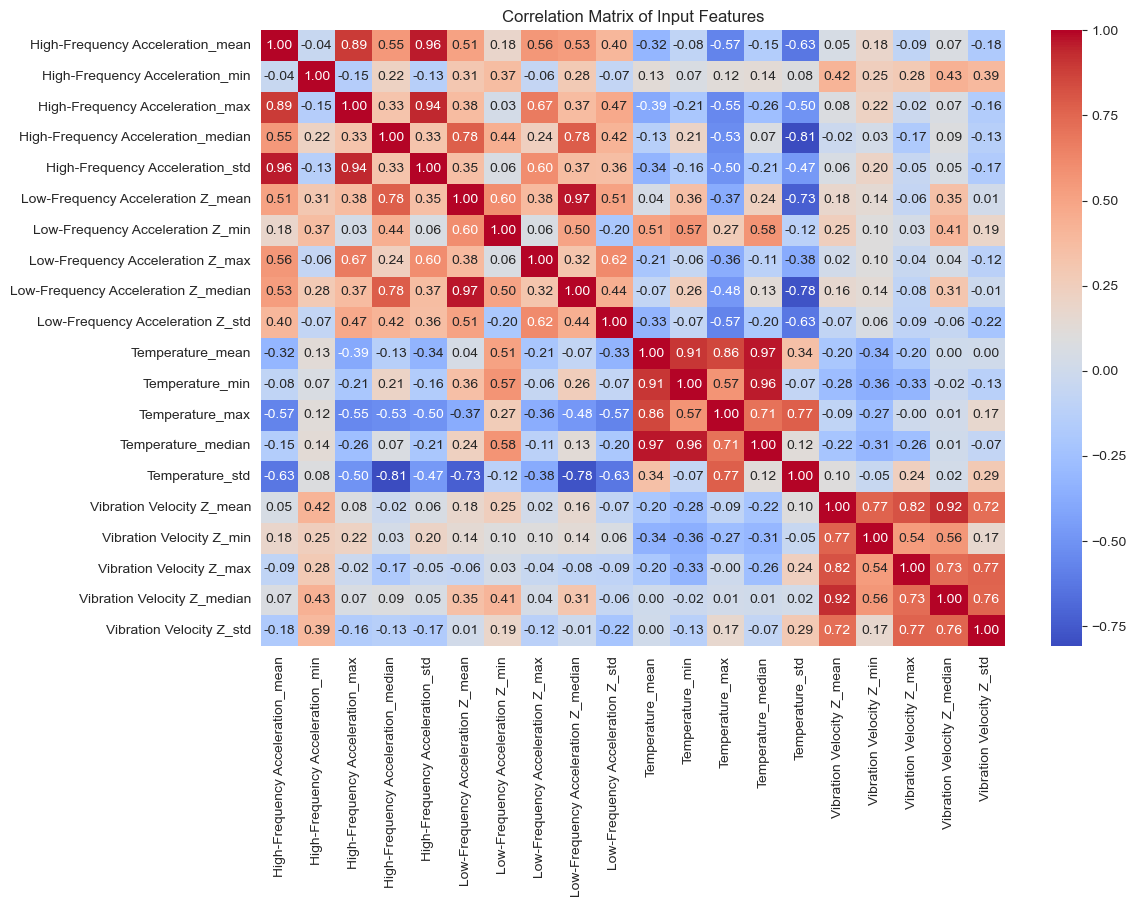

In [22]:
correlation_matrix = df1[input_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True, fmt=".2f", cmap="coolwarm", cbar=True
)
plt.title("Correlation Matrix of Input Features")
plt.show()

#### High Temp Correlation Plot

<Axes: >

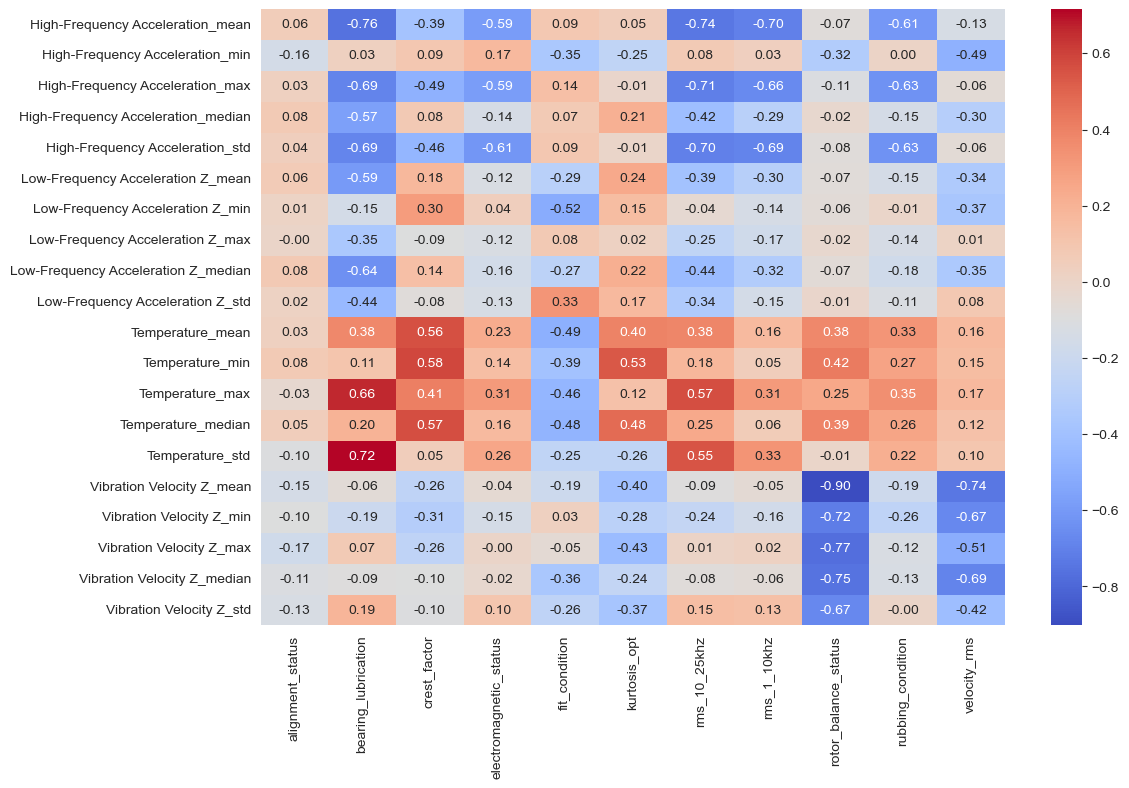

In [21]:
correlation_matrix = df1[input_features + target_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix.loc[input_features, target_features],
    annot=True, fmt=".2f", cmap="coolwarm", cbar=True
)

In [23]:
X = df[input_features]
y = df[target_features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scalar = StandardScaler()

X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [25]:
from sklearn.linear_model import LinearRegression

linear_results = train_and_evaluate_model(
    model=LinearRegression(),
    param_grid=None,  # No hyperparameter grid for Linear Regression
    X_train=X_train_scaled,
    X_test=X_test_scaled,
    y_train=y_train,
    y_test=y_test,
    target_features=target_features,
    tune_hyperparameters=False
)



Training model for target: alignment_status
Target: alignment_status | Train RMSE: 3.0259 | Test RMSE: 3.2010 | Train R²: 0.1377 | Test R²: 0.1737

Training model for target: bearing_lubrication
Target: bearing_lubrication | Train RMSE: 0.2782 | Test RMSE: 0.2752 | Train R²: 0.0986 | Test R²: 0.1550

Training model for target: crest_factor
Target: crest_factor | Train RMSE: 0.5601 | Test RMSE: 0.5608 | Train R²: 0.5474 | Test R²: 0.5972

Training model for target: electromagnetic_status
Target: electromagnetic_status | Train RMSE: 0.0000 | Test RMSE: 0.0000 | Train R²: 1.0000 | Test R²: 1.0000

Training model for target: fit_condition
Target: fit_condition | Train RMSE: 2.1016 | Test RMSE: 2.2829 | Train R²: 0.2681 | Test R²: 0.1745

Training model for target: kurtosis_opt
Target: kurtosis_opt | Train RMSE: 0.6289 | Test RMSE: 0.7218 | Train R²: 0.3893 | Test R²: 0.3309

Training model for target: rms_10_25khz
Target: rms_10_25khz | Train RMSE: 0.0000 | Test RMSE: 0.0000 | Train R²: 1

In [26]:
from sklearn.linear_model import Ridge

ridge_param_grid = {"alpha": [0.01, 0.1, 1, 10, 100]}
ridge_results = train_and_evaluate_model(
    model=Ridge(),
    param_grid=ridge_param_grid,
    X_train=X_train_scaled,
    X_test=X_test_scaled,
    y_train=y_train,
    y_test=y_test,
    target_features=target_features,
    tune_hyperparameters=True
)


Training model for target: alignment_status
Target: alignment_status | Train RMSE: 3.0283 | Test RMSE: 3.2116 | Train R²: 0.1364 | Test R²: 0.1683
Best Params: {'alpha': 0.01}

Training model for target: bearing_lubrication
Target: bearing_lubrication | Train RMSE: 0.2818 | Test RMSE: 0.2844 | Train R²: 0.0747 | Test R²: 0.0972
Best Params: {'alpha': 100}

Training model for target: crest_factor
Target: crest_factor | Train RMSE: 0.5603 | Test RMSE: 0.5616 | Train R²: 0.5471 | Test R²: 0.5961
Best Params: {'alpha': 0.01}

Training model for target: electromagnetic_status
Target: electromagnetic_status | Train RMSE: 0.0000 | Test RMSE: 0.0000 | Train R²: 1.0000 | Test R²: 1.0000
Best Params: {'alpha': 0.01}

Training model for target: fit_condition
Target: fit_condition | Train RMSE: 2.1690 | Test RMSE: 2.4032 | Train R²: 0.2204 | Test R²: 0.0852
Best Params: {'alpha': 100}

Training model for target: kurtosis_opt
Target: kurtosis_opt | Train RMSE: 0.6349 | Test RMSE: 0.7193 | Train R²

In [27]:
from sklearn.tree import DecisionTreeRegressor

tree_param_grid = {
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5]
}
tree_results = train_and_evaluate_model(
    model=DecisionTreeRegressor(random_state=42),
    param_grid=tree_param_grid,
    X_train=X_train_scaled,
    X_test=X_test_scaled,
    y_train=y_train,
    y_test=y_test,
    target_features=target_features,
    tune_hyperparameters=True
)



Training model for target: alignment_status
Target: alignment_status | Train RMSE: 3.0546 | Test RMSE: 3.5454 | Train R²: 0.1213 | Test R²: -0.0136
Best Params: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}

Training model for target: bearing_lubrication
Target: bearing_lubrication | Train RMSE: 0.2698 | Test RMSE: 0.2837 | Train R²: 0.1522 | Test R²: 0.1021
Best Params: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10}

Training model for target: crest_factor
Target: crest_factor | Train RMSE: 0.5693 | Test RMSE: 0.7145 | Train R²: 0.5325 | Test R²: 0.3461
Best Params: {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}

Training model for target: electromagnetic_status
Target: electromagnetic_status | Train RMSE: 0.0000 | Test RMSE: 0.0000 | Train R²: 1.0000 | Test R²: 1.0000
Best Params: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}

Training model for target: fit_condition
Target: fit_condition | Train RMSE: 2.1033 | T

In [28]:
from sklearn.ensemble import RandomForestRegressor

rf_param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [5, 10, 15, None],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}
rf_results = train_and_evaluate_model(
    model=RandomForestRegressor(random_state=42),
    param_grid=rf_param_grid,
    X_train=X_train_scaled,
    X_test=X_test_scaled,
    y_train=y_train,
    y_test=y_test,
    target_features=target_features,
    tune_hyperparameters=True
)



Training model for target: alignment_status
Target: alignment_status | Train RMSE: 2.6291 | Test RMSE: 3.3553 | Train R²: 0.3490 | Test R²: 0.0922
Best Params: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}

Training model for target: bearing_lubrication
Target: bearing_lubrication | Train RMSE: 0.2276 | Test RMSE: 0.2874 | Train R²: 0.3965 | Test R²: 0.0787
Best Params: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Training model for target: crest_factor
Target: crest_factor | Train RMSE: 0.2753 | Test RMSE: 0.6013 | Train R²: 0.8906 | Test R²: 0.5369
Best Params: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}

Training model for target: electromagnetic_status
Target: electromagnetic_status | Train RMSE: 0.0000 | Test RMSE: 0.0000 | Train R²: 1.0000 | Test R²: 1.0000
Best Params: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

Trai

In [29]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_param_grid = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5, 7]
}
gbr_results = train_and_evaluate_model(
    model=GradientBoostingRegressor(random_state=42),
    param_grid=gbr_param_grid,
    X_train=X_train_scaled,
    X_test=X_test_scaled,
    y_train=y_train,
    y_test=y_test,
    target_features=target_features,
    tune_hyperparameters=True
)



Training model for target: alignment_status
Target: alignment_status | Train RMSE: 3.0007 | Test RMSE: 3.3815 | Train R²: 0.1521 | Test R²: 0.0780
Best Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}

Training model for target: bearing_lubrication
Target: bearing_lubrication | Train RMSE: 0.2660 | Test RMSE: 0.2901 | Train R²: 0.1756 | Test R²: 0.0609
Best Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}

Training model for target: crest_factor
Target: crest_factor | Train RMSE: 0.4321 | Test RMSE: 0.6020 | Train R²: 0.7306 | Test R²: 0.5359
Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

Training model for target: electromagnetic_status
Target: electromagnetic_status | Train RMSE: 0.0000 | Test RMSE: 0.0000 | Train R²: 1.0000 | Test R²: 1.0000
Best Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}

Training model for target: fit_condition
Target: fit_condition | Train RMSE: 1.8726 | Test RMSE: 2.4030 

In [30]:
from xgboost import XGBRegressor

xgb_param_grid = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5, 7]
}
xgb_results = train_and_evaluate_model(
    model=XGBRegressor(random_state=42),
    param_grid=xgb_param_grid,
    X_train=X_train_scaled,
    X_test=X_test_scaled,
    y_train=y_train,
    y_test=y_test,
    target_features=target_features,
    tune_hyperparameters=True
)



Training model for target: alignment_status
Target: alignment_status | Train RMSE: 3.0124 | Test RMSE: 3.3771 | Train R²: 0.1454 | Test R²: 0.0804
Best Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}

Training model for target: bearing_lubrication
Target: bearing_lubrication | Train RMSE: 0.2511 | Test RMSE: 0.2895 | Train R²: 0.2654 | Test R²: 0.0648
Best Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}

Training model for target: crest_factor
Target: crest_factor | Train RMSE: 0.4380 | Test RMSE: 0.5968 | Train R²: 0.7233 | Test R²: 0.5438
Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

Training model for target: electromagnetic_status
Target: electromagnetic_status | Train RMSE: 0.0000 | Test RMSE: 0.0000 | Train R²: 1.0000 | Test R²: 1.0000
Best Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}

Training model for target: fit_condition
Target: fit_condition | Train RMSE: 1.5923 | Test RMSE: 2.4495 

In [33]:
from sklearn.svm import SVR

svr_param_grid = {
    "kernel": ["linear", "rbf"],
    "C": [0.1, 1, 10],
    "epsilon": [0.01, 0.1, 0.2]
}
svr_results = train_and_evaluate_model(
    model=SVR(),
    param_grid=svr_param_grid,
    X_train=X_train_scaled,
    X_test=X_test_scaled,
    y_train=y_train,
    y_test=y_test,
    target_features=target_features,
    tune_hyperparameters=True
)



Training model for target: alignment_status
Target: alignment_status | Train RMSE: 3.1607 | Test RMSE: 3.4371 | Train R²: 0.0592 | Test R²: 0.0474
Best Params: {'C': 0.1, 'epsilon': 0.2, 'kernel': 'linear'}

Training model for target: bearing_lubrication
Target: bearing_lubrication | Train RMSE: 0.2728 | Test RMSE: 0.2899 | Train R²: 0.1328 | Test R²: 0.0620
Best Params: {'C': 0.1, 'epsilon': 0.2, 'kernel': 'rbf'}

Training model for target: crest_factor
Target: crest_factor | Train RMSE: 0.5663 | Test RMSE: 0.5699 | Train R²: 0.5373 | Test R²: 0.5840
Best Params: {'C': 10, 'epsilon': 0.2, 'kernel': 'linear'}

Training model for target: electromagnetic_status
Target: electromagnetic_status | Train RMSE: 0.0000 | Test RMSE: 0.0000 | Train R²: 1.0000 | Test R²: 1.0000
Best Params: {'C': 0.1, 'epsilon': 0.01, 'kernel': 'linear'}

Training model for target: fit_condition
Target: fit_condition | Train RMSE: 1.7878 | Test RMSE: 2.3834 | Train R²: 0.4703 | Test R²: 0.1003
Best Params: {'C': 

In [32]:
import pandas as pd

# Example: Collect results from multiple models
all_results = {
    "Linear Regression": linear_results,
    "Ridge Regression": ridge_results,
    "Decision Tree": tree_results,
    "Random Forest": rf_results,
    "Gradient Boosting": gbr_results,
    "XGBoost": xgb_results,
    "SVR": svr_results
}

# Convert each model's results into a DataFrame
comparison_df = pd.DataFrame({
    model_name: {target: metrics["Test RMSE"] for target, metrics in results.items()}
    for model_name, results in all_results.items()
})

# Display the comparison
print("\nComparison of Test RMSE Across Models:")
print(comparison_df)


Comparison of Test RMSE Across Models:
                        Linear Regression  Ridge Regression  Decision Tree  \
alignment_status                 3.201038          3.211569       3.545367   
bearing_lubrication              0.275195          0.284446       0.283677   
crest_factor                     0.560775          0.561559       0.714519   
electromagnetic_status           0.000000          0.000000       0.000000   
fit_condition                    2.282920          2.403234       2.454215   
kurtosis_opt                     0.721789          0.719276       0.834076   
rms_10_25khz                     0.000000          0.000000       0.000000   
rms_1_10khz                      0.080842          0.084301       0.097911   
rotor_balance_status             2.415488          2.402781       2.544583   
rubbing_condition                0.374126          0.374799       0.592191   
velocity_rms                     2.281196          2.425731       2.544524   

                       

#### Tube Mill

In [35]:
df2 = pd.read_csv("../Data/process/Tube Mill_merged.csv")

In [37]:
   # Separate Input Features (X) and Target Features (y)
input_features = [
    'High-Frequency Acceleration_mean', 'High-Frequency Acceleration_min',
    'High-Frequency Acceleration_max', 'High-Frequency Acceleration_median',
    'High-Frequency Acceleration_std', 'Low-Frequency Acceleration Z_mean',
    'Low-Frequency Acceleration Z_min', 'Low-Frequency Acceleration Z_max',
    'Low-Frequency Acceleration Z_median', 'Low-Frequency Acceleration Z_std',
    'Temperature_mean', 'Temperature_min', 'Temperature_max', 'Temperature_median',
    'Temperature_std', 'Vibration Velocity Z_mean', 'Vibration Velocity Z_min',
    'Vibration Velocity Z_max', 'Vibration Velocity Z_median', 'Vibration Velocity Z_std'
]


target_features = [
    'alignment_status', 'bearing_lubrication', 'crest_factor',
    'electromagnetic_status', 'fit_condition', 'kurtosis_opt',
    'rms_10_25khz', 'rms_1_10khz', 'rotor_balance_status',
    'rubbing_condition', 'velocity_rms',
    'peak_10_1000hz', 'peak_value_opt', 'rms_0_10hz', 'rms_10_100hz'
]


X = df2[input_features]
y = df2[target_features]

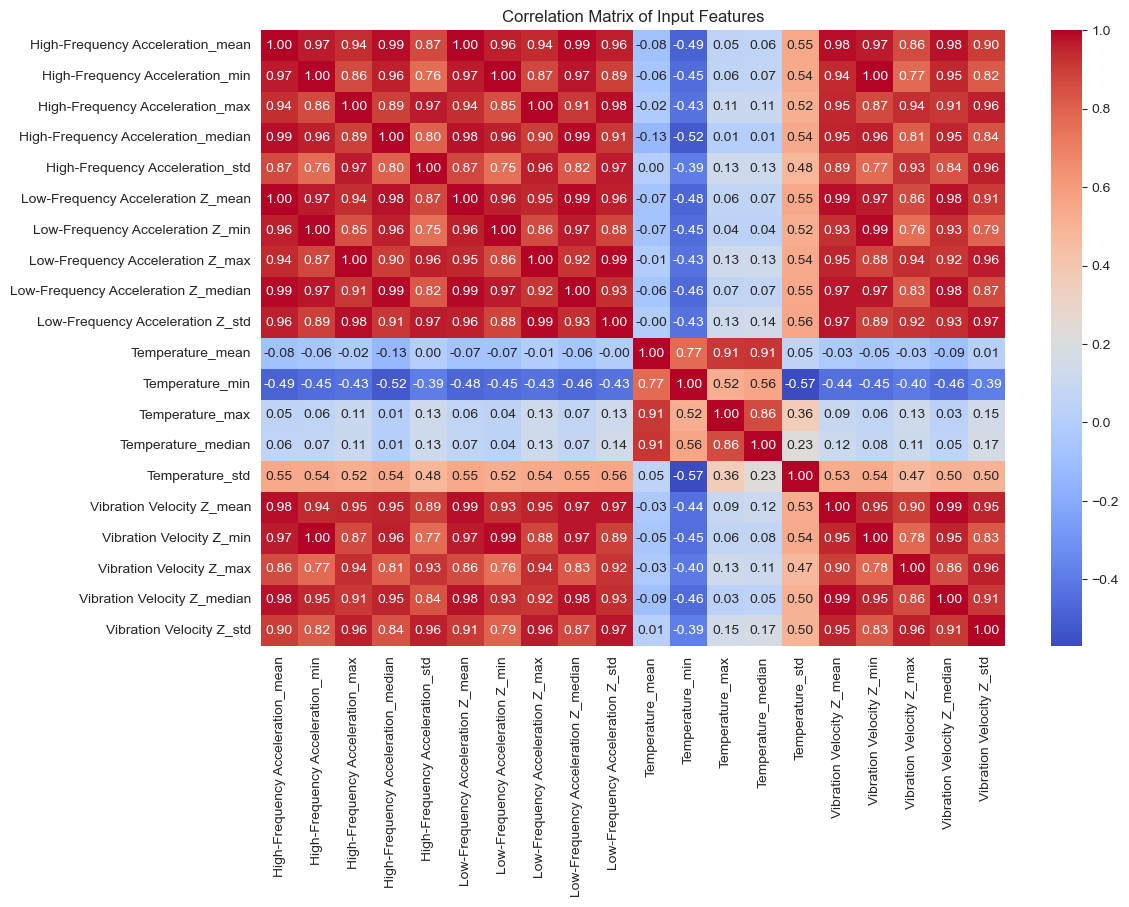

In [40]:
correlation_matrix = df2[input_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True, fmt=".2f", cmap="coolwarm", cbar=True
)
plt.title("Correlation Matrix of Input Features")
plt.show()


### Tube Mill Plot

<Axes: >

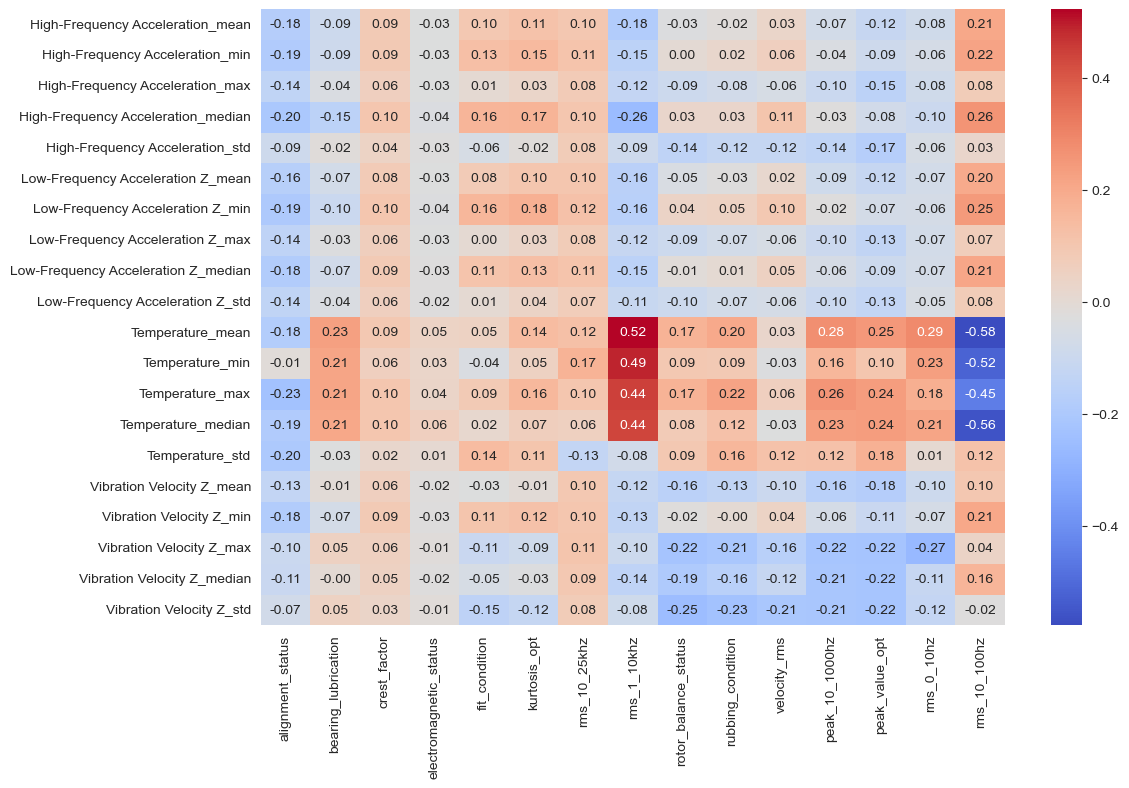

In [41]:
#### Input-Target Correlation
correlation_matrix = df2[input_features + target_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix.loc[input_features, target_features],
    annot=True, fmt=".2f", cmap="coolwarm", cbar=True
)

In [43]:
X = df2[input_features]
y = df2[target_features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scalar = StandardScaler()

X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [44]:
from sklearn.linear_model import LinearRegression

linear_results = train_and_evaluate_model(
    model=LinearRegression(),
    param_grid=None,  # No hyperparameter grid for Linear Regression
    X_train=X_train_scaled,
    X_test=X_test_scaled,
    y_train=y_train,
    y_test=y_test,
    target_features=target_features,
    tune_hyperparameters=False
)




Training model for target: alignment_status
Target: alignment_status | Train RMSE: 1.7514 | Test RMSE: 1.8774 | Train R²: 0.2555 | Test R²: 0.1001

Training model for target: bearing_lubrication
Target: bearing_lubrication | Train RMSE: 0.7611 | Test RMSE: 0.9482 | Train R²: 0.4352 | Test R²: 0.1563

Training model for target: crest_factor
Target: crest_factor | Train RMSE: 0.3450 | Test RMSE: 0.3835 | Train R²: 0.1073 | Test R²: 0.0006

Training model for target: electromagnetic_status
Target: electromagnetic_status | Train RMSE: 0.0078 | Test RMSE: 0.0017 | Train R²: 0.0346 | Test R²: 0.0000

Training model for target: fit_condition
Target: fit_condition | Train RMSE: 1.6181 | Test RMSE: 1.8291 | Train R²: 0.6450 | Test R²: 0.6172

Training model for target: kurtosis_opt
Target: kurtosis_opt | Train RMSE: 1.7694 | Test RMSE: 1.9097 | Train R²: 0.6550 | Test R²: 0.6177

Training model for target: rms_10_25khz
Target: rms_10_25khz | Train RMSE: 0.1658 | Test RMSE: 0.2395 | Train R²: 0

In [45]:
from sklearn.linear_model import Ridge

ridge_param_grid = {"alpha": [0.01, 0.1, 1, 10, 100]}
ridge_results = train_and_evaluate_model(
    model=Ridge(),
    param_grid=ridge_param_grid,
    X_train=X_train_scaled,
    X_test=X_test_scaled,
    y_train=y_train,
    y_test=y_test,
    target_features=target_features,
    tune_hyperparameters=True
)
from sklearn.tree import DecisionTreeRegressor




Training model for target: alignment_status
Target: alignment_status | Train RMSE: 1.7719 | Test RMSE: 1.8505 | Train R²: 0.2381 | Test R²: 0.1257
Best Params: {'alpha': 1}

Training model for target: bearing_lubrication
Target: bearing_lubrication | Train RMSE: 0.7613 | Test RMSE: 0.9383 | Train R²: 0.4349 | Test R²: 0.1737
Best Params: {'alpha': 0.01}

Training model for target: crest_factor
Target: crest_factor | Train RMSE: 0.3460 | Test RMSE: 0.3795 | Train R²: 0.1026 | Test R²: 0.0216
Best Params: {'alpha': 1}

Training model for target: electromagnetic_status
Target: electromagnetic_status | Train RMSE: 0.0079 | Test RMSE: 0.0007 | Train R²: 0.0100 | Test R²: 0.0000
Best Params: {'alpha': 100}

Training model for target: fit_condition
Target: fit_condition | Train RMSE: 1.6204 | Test RMSE: 1.8300 | Train R²: 0.6440 | Test R²: 0.6168
Best Params: {'alpha': 0.1}

Training model for target: kurtosis_opt
Target: kurtosis_opt | Train RMSE: 1.7708 | Test RMSE: 1.9169 | Train R²: 0.65

In [46]:
tree_param_grid = {
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5]
}
tree_results = train_and_evaluate_model(
    model=DecisionTreeRegressor(random_state=42),
    param_grid=tree_param_grid,
    X_train=X_train_scaled,
    X_test=X_test_scaled,
    y_train=y_train,
    y_test=y_test,
    target_features=target_features,
    tune_hyperparameters=True
)




Training model for target: alignment_status
Target: alignment_status | Train RMSE: 1.6486 | Test RMSE: 1.9250 | Train R²: 0.3404 | Test R²: 0.0539
Best Params: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}

Training model for target: bearing_lubrication
Target: bearing_lubrication | Train RMSE: 0.5325 | Test RMSE: 0.6894 | Train R²: 0.7235 | Test R²: 0.5539
Best Params: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5}

Training model for target: crest_factor
Target: crest_factor | Train RMSE: 0.3091 | Test RMSE: 0.4103 | Train R²: 0.2834 | Test R²: -0.1440
Best Params: {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}

Training model for target: electromagnetic_status
Target: electromagnetic_status | Train RMSE: 0.0004 | Test RMSE: 0.0159 | Train R²: 0.9973 | Test R²: 0.0000
Best Params: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}

Training model for target: fit_condition
Target: fit_condition | Train RMSE: 1.5672 | Te

In [47]:
from sklearn.ensemble import RandomForestRegressor

rf_param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [5, 10, 15, None],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}
rf_results = train_and_evaluate_model(
    model=RandomForestRegressor(random_state=42),
    param_grid=rf_param_grid,
    X_train=X_train_scaled,
    X_test=X_test_scaled,
    y_train=y_train,
    y_test=y_test,
    target_features=target_features,
    tune_hyperparameters=True
)




Training model for target: alignment_status
Target: alignment_status | Train RMSE: 0.8507 | Test RMSE: 1.6330 | Train R²: 0.8244 | Test R²: 0.3191
Best Params: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}

Training model for target: bearing_lubrication
Target: bearing_lubrication | Train RMSE: 0.2088 | Test RMSE: 0.5531 | Train R²: 0.9575 | Test R²: 0.7129
Best Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

Training model for target: crest_factor
Target: crest_factor | Train RMSE: 0.2881 | Test RMSE: 0.3644 | Train R²: 0.3777 | Test R²: 0.0976
Best Params: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}

Training model for target: electromagnetic_status
Target: electromagnetic_status | Train RMSE: 0.0028 | Test RMSE: 0.0062 | Train R²: 0.8736 | Test R²: 0.0000
Best Params: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

Trai

In [48]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_param_grid = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5, 7]
}
gbr_results = train_and_evaluate_model(
    model=GradientBoostingRegressor(random_state=42),
    param_grid=gbr_param_grid,
    X_train=X_train_scaled,
    X_test=X_test_scaled,
    y_train=y_train,
    y_test=y_test,
    target_features=target_features,
    tune_hyperparameters=True
)




Training model for target: alignment_status
Target: alignment_status | Train RMSE: 1.0531 | Test RMSE: 1.6659 | Train R²: 0.7309 | Test R²: 0.2914
Best Params: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}

Training model for target: bearing_lubrication
Target: bearing_lubrication | Train RMSE: 0.0670 | Test RMSE: 0.6072 | Train R²: 0.9956 | Test R²: 0.6539
Best Params: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}

Training model for target: crest_factor
Target: crest_factor | Train RMSE: 0.2453 | Test RMSE: 0.3684 | Train R²: 0.5488 | Test R²: 0.0778
Best Params: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}

Training model for target: electromagnetic_status
Target: electromagnetic_status | Train RMSE: 0.0048 | Test RMSE: 0.0034 | Train R²: 0.6323 | Test R²: 0.0000
Best Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}

Training model for target: fit_condition
Target: fit_condition | Train RMSE: 0.4594 | Test RMSE: 1.5911

In [49]:
from xgboost import XGBRegressor

xgb_param_grid = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5, 7]
}
xgb_results = train_and_evaluate_model(
    model=XGBRegressor(random_state=42),
    param_grid=xgb_param_grid,
    X_train=X_train_scaled,
    X_test=X_test_scaled,
    y_train=y_train,
    y_test=y_test,
    target_features=target_features,
    tune_hyperparameters=True
)




Training model for target: alignment_status
Target: alignment_status | Train RMSE: 0.7635 | Test RMSE: 1.6449 | Train R²: 0.8585 | Test R²: 0.3092
Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}

Training model for target: bearing_lubrication
Target: bearing_lubrication | Train RMSE: 0.1624 | Test RMSE: 0.5835 | Train R²: 0.9743 | Test R²: 0.6805
Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}

Training model for target: crest_factor
Target: crest_factor | Train RMSE: 0.2688 | Test RMSE: 0.3645 | Train R²: 0.4584 | Test R²: 0.0975
Best Params: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 100}

Training model for target: electromagnetic_status
Target: electromagnetic_status | Train RMSE: 0.0062 | Test RMSE: 0.0004 | Train R²: 0.3924 | Test R²: 0.0000
Best Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}

Training model for target: fit_condition
Target: fit_condition | Train RMSE: 0.5053 | Test RMSE: 1.6221 |

In [50]:
from sklearn.svm import SVR

svr_param_grid = {
    "kernel": ["linear", "rbf"],
    "C": [0.1, 1, 10],
    "epsilon": [0.01, 0.1, 0.2]
}
svr_results = train_and_evaluate_model(
    model=SVR(),
    param_grid=svr_param_grid,
    X_train=X_train_scaled,
    X_test=X_test_scaled,
    y_train=y_train,
    y_test=y_test,
    target_features=target_features,
    tune_hyperparameters=True
)




Training model for target: alignment_status
Target: alignment_status | Train RMSE: 1.5347 | Test RMSE: 1.7928 | Train R²: 0.4284 | Test R²: 0.1793
Best Params: {'C': 10, 'epsilon': 0.2, 'kernel': 'rbf'}

Training model for target: bearing_lubrication
Target: bearing_lubrication | Train RMSE: 0.5375 | Test RMSE: 0.7036 | Train R²: 0.7183 | Test R²: 0.5354
Best Params: {'C': 10, 'epsilon': 0.2, 'kernel': 'rbf'}

Training model for target: crest_factor
Target: crest_factor | Train RMSE: 0.3298 | Test RMSE: 0.3680 | Train R²: 0.1846 | Test R²: 0.0798
Best Params: {'C': 1, 'epsilon': 0.2, 'kernel': 'rbf'}

Training model for target: electromagnetic_status
Target: electromagnetic_status | Train RMSE: 0.0084 | Test RMSE: 0.0043 | Train R²: -0.1201 | Test R²: 0.0000
Best Params: {'C': 1, 'epsilon': 0.01, 'kernel': 'rbf'}

Training model for target: fit_condition
Target: fit_condition | Train RMSE: 1.6987 | Test RMSE: 2.0198 | Train R²: 0.6088 | Test R²: 0.5332
Best Params: {'C': 10, 'epsilon'

In [51]:
import pandas as pd

# Example: Collect results from multiple models
all_results = {
    "Linear Regression": linear_results,
    "Ridge Regression": ridge_results,
    "Decision Tree": tree_results,
    "Random Forest": rf_results,
    "Gradient Boosting": gbr_results,
    "XGBoost": xgb_results,
    "SVR": svr_results
}

# Convert each model's results into a DataFrame
comparison_df = pd.DataFrame({
    model_name: {target: metrics["Test RMSE"] for target, metrics in results.items()}
    for model_name, results in all_results.items()
})

# Display the comparison
print("\nComparison of Test RMSE Across Models:")
print(comparison_df)


Comparison of Test RMSE Across Models:
                        Linear Regression  Ridge Regression  Decision Tree  \
alignment_status                 1.877415          1.850545       1.924993   
bearing_lubrication              0.948172          0.938339       0.689445   
crest_factor                     0.383524          0.379479       0.410337   
electromagnetic_status           0.001669          0.000684       0.015889   
fit_condition                    1.829053          1.829961       1.824238   
kurtosis_opt                     1.909659          1.916939       1.702308   
rms_10_25khz                     0.239464          0.231785       0.173428   
rms_1_10khz                      0.308506          0.304260       0.196609   
rotor_balance_status             0.527095          0.527163       0.519568   
rubbing_condition                1.311681          1.289302       1.321701   
velocity_rms                     3.157208          3.140845       2.858534   
peak_10_1000hz          

#### Tube Mill


| **Target**               | **Linear Regression** | **Ridge Regression** | **Decision Tree** | **Random Forest**  | **Gradient Boost**  | **XGBoost**        | **SVR**            | **Best Model**     |
|--------------------------|-----------------------|-----------------------|-------------------|--------------------|---------------------|--------------------|--------------------|--------------------|
| **alignment_status**     | RMSE: 1.8774<br>R²: 0.1001 | RMSE: 1.8505<br>R²: 0.1257 | RMSE: 1.9250<br>R²: 0.0539 | RMSE: 1.6330<br>R²: 0.3191 | RMSE: 1.6659<br>R²: 0.2914 | RMSE: 1.6449<br>R²: 0.3092 | RMSE: 1.7928<br>R²: 0.1793 | **Random Forest**  |
| **bearing_lubrication**  | RMSE: 0.9482<br>R²: 0.1563 | RMSE: 0.9383<br>R²: 0.1737 | RMSE: 0.6894<br>R²: 0.5539 | RMSE: 0.5531<br>R²: 0.7129 | RMSE: 0.6072<br>R²: 0.6539 | RMSE: 0.5835<br>R²: 0.6805 | RMSE: 0.7036<br>R²: 0.5354 | **Random Forest**  |
| **crest_factor**          | RMSE: 0.3835<br>R²: 0.0006 | RMSE: 0.3795<br>R²: 0.0216 | RMSE: 0.4103<br>R²: -0.1440 | RMSE: 0.3644<br>R²: 0.0976 | RMSE: 0.3684<br>R²: 0.0778 | RMSE: 0.3645<br>R²: 0.0975 | RMSE: 0.3680<br>R²: 0.0798 | **Random Forest**  |
| **electromagnetic_status** | RMSE: 0.0017<br>R²: 0.0000 | RMSE: 0.0007<br>R²: 0.0000 | RMSE: 0.0159<br>R²: 0.0000 | RMSE: 0.0062<br>R²: 0.0000 | RMSE: 0.0034<br>R²: 0.0000 | RMSE: 0.0004<br>R²: 0.0000 | RMSE: 0.0043<br>R²: 0.0000 | **Ridge Regression** (tie) |
| **fit_condition**         | RMSE: 1.8291<br>R²: 0.6172 | RMSE: 1.8300<br>R²: 0.6168 | RMSE: 1.8242<br>R²: 0.6192 | RMSE: 1.6363<br>R²: 0.6936 | RMSE: 1.5911<br>R²: 0.7103 | RMSE: 1.6221<br>R²: 0.6990 | RMSE: 2.0198<br>R²: 0.5332 | **Gradient Boost**  |
| **kurtosis_opt**          | RMSE: 1.9097<br>R²: 0.6177 | RMSE: 1.9169<br>R²: 0.6147 | RMSE: 1.7023<br>R²: 0.6962 | RMSE: 1.4319<br>R²: 0.7850 | RMSE: 1.4384<br>R²: 0.7831 | RMSE: 1.5249<br>R²: 0.7562 | RMSE: 2.0445<br>R²: 0.5618 | **Random Forest**  |
| **rms_10_25khz**          | RMSE: 0.2395<br>R²: -0.9246 | RMSE: 0.2318<br>R²: -0.8031 | RMSE: 0.1734<br>R²: -0.0095 | RMSE: 0.1323<br>R²: 0.4123 | RMSE: 0.1328<br>R²: 0.4080 | RMSE: 0.1242<br>R²: 0.4822 | RMSE: 0.1380<br>R²: 0.3610 | **XGBoost**        |
| **rms_1_10khz**           | RMSE: 0.3085<br>R²: 0.5230 | RMSE: 0.3043<br>R²: 0.5360 | RMSE: 0.1966<br>R²: 0.8063 | RMSE: 0.1804<br>R²: 0.8369 | RMSE: 0.1982<br>R²: 0.8031 | RMSE: 0.1765<br>R²: 0.8439 | RMSE: 0.2538<br>R²: 0.6773 | **XGBoost**        |
| **rotor_balance_status**  | RMSE: 0.5271<br>R²: 0.7039 | RMSE: 0.5272<br>R²: 0.7038 | RMSE: 0.5196<br>R²: 0.7123 | RMSE: 0.4363<br>R²: 0.7971 | RMSE: 0.4436<br>R²: 0.7902 | RMSE: 0.4628<br>R²: 0.7716 | RMSE: 0.5169<br>R²: 0.7152 | **Random Forest**  |
| **rubbing_condition**     | RMSE: 1.3117<br>R²: 0.6447 | RMSE: 1.2893<br>R²: 0.6567 | RMSE: 1.3217<br>R²: 0.6392 | RMSE: 1.1174<br>R²: 0.7422 | RMSE: 1.1826<br>R²: 0.7112 | RMSE: 1.1144<br>R²: 0.7435 | RMSE: 1.2143<br>R²: 0.6955 | **XGBoost**        |
| **velocity_rms**          | RMSE: 3.1572<br>R²: 0.5970 | RMSE: 3.1408<br>R²: 0.6012 | RMSE: 2.8585<br>R²: 0.6697 | RMSE: 2.6285<br>R²: 0.7207 | RMSE: 2.3747<br>R²: 0.7720 | RMSE: 2.4395<br>R²: 0.7594 | RMSE: 3.2606<br>R²: 0.5702 | **Gradient Boost**  |
| **peak_10_1000hz**        | RMSE: 4.0206<br>R²: 0.5732 | RMSE: 3.9829<br>R²: 0.5812 | RMSE: 3.8419<br>R²: 0.6103 | RMSE: 3.1912<br>R²: 0.7311 | RMSE: 3.2425<br>R²: 0.7224 | RMSE: 3.1490<br>R²: 0.7382 | RMSE: 3.9138<br>R²: 0.5956 | **XGBoost**        |
| **peak_value_opt**        | RMSE: 4.5939<br>R²: 0.4905 | RMSE: 4.5967<br>R²: 0.4898 | RMSE: 4.6934<br>R²: 0.4682 | RMSE: 4.1582<br>R²: 0.5825 | RMSE: 4.2167<br>R²: 0.5707 | RMSE: 4.1677<br>R²: 0.5806 | RMSE: 4.8849<br>R²: 0.4239 | **Random Forest**  |
| **rms_0_10hz**            | RMSE: 2.2825<br>R²: 0.0422 | RMSE: 2.1903<br>R²: 0.1180 | RMSE: 2.5787<br>R²: -0.2225 | RMSE: 2.2778<br>R²: 0.0462 | RMSE: 2.5673<br>R²: -0.2117 | RMSE: 2.4840<br>R²: -0.1344 | RMSE: 1.9276<br>R²: 0.3169 | **SVR**            |
| **rms_10_100hz**          | RMSE: 2.4618<br>R²: 0.6986 | RMSE: 2.4593<br>R²: 0.6992 | RMSE: 1.9549<br>R²: 0.8099 | RMSE: 1.5711<br>R²: 0.8772 | RMSE: 1.5982<br>R²: 0.8730 | RMSE: 1.5974<br>R²: 0.8731 | RMSE: 1.9623<br>R²: 0.8085 | **Random Forest**  |

---

### **Summary of Best Models Count**
Based on the table, here’s a count of how many times each model performed best (as shown in the "Best Model" column):

| **Model**            | **Count of Best Performance** |
|-----------------------|-------------------------------|
| Random Forest         | 8                             |
| XGBoost               | 5                             |
| Gradient Boost        | 3                             |
| SVR                   | 1                             |
| Ridge Regression      | 1 (Tie with others, negligible) |

---

#### Conveyor Belt

| **Target**               | **Linear Regression**         | **Ridge Regression**         | **Decision Tree**           | **Random Forest**           | **Gradient Boost**          | **XGBoost**                | **SVR**                    | **Best Model**             |
|--------------------------|-------------------------------|-------------------------------|-----------------------------|-----------------------------|-----------------------------|-----------------------------|-----------------------------|----------------------------|
| **alignment_status**     | RMSE: 3.4317<br>R²: 0.0504  | RMSE: 3.4365<br>R²: 0.0477  | RMSE: 3.3781<br>R²: 0.0798 | RMSE: 3.3585<br>R²: 0.0905 | RMSE: 3.3978<br>R²: 0.0691 | RMSE: 3.3771<br>R²: 0.0804 | RMSE: 3.4371<br>R²: 0.0474 | **Random Forest**         |
| **bearing_lubrication**  | RMSE: 0.2884<br>R²: 0.0721  | RMSE: 0.2915<br>R²: 0.0519  | RMSE: 0.2992<br>R²: 0.0014 | RMSE: 0.2893<br>R²: 0.0662 | RMSE: 0.2931<br>R²: 0.0417 | RMSE: 0.2895<br>R²: 0.0648 | RMSE: 0.2899<br>R²: 0.0620 | **Linear Regression**     |
| **crest_factor**          | RMSE: 0.5899<br>R²: 0.5542  | RMSE: 0.5899<br>R²: 0.5542  | RMSE: 0.7112<br>R²: 0.3520 | RMSE: 0.6678<br>R²: 0.4287 | RMSE: 0.6548<br>R²: 0.4509 | RMSE: 0.5968<br>R²: 0.5438 | RMSE: 0.5699<br>R²: 0.5840 | **Linear/Ridge Regression** |
| **electromagnetic_status** | RMSE: 0.0000<br>R²: 1.0000  | RMSE: 0.0000<br>R²: 1.0000  | RMSE: 0.0000<br>R²: 1.0000 | RMSE: 0.0000<br>R²: 1.0000 | RMSE: 0.0000<br>R²: 1.0000 | RMSE: 0.0000<br>R²: 1.0000 | RMSE: 0.0000<br>R²: 1.0000 | **All Models (Tie)**     |
| **fit_condition**         | RMSE: 2.4525<br>R²: 0.0473  | RMSE: 2.4442<br>R²: 0.0538  | RMSE: 2.4872<br>R²: 0.0202 | RMSE: 2.3901<br>R²: 0.0952 | RMSE: 2.4057<br>R²: 0.0833 | RMSE: 2.4495<br>R²: 0.0497 | RMSE: 2.3834<br>R²: 0.1003 | **Random Forest**         |
| **kurtosis_opt**          | RMSE: 0.7216<br>R²: 0.3312  | RMSE: 0.7239<br>R²: 0.3269  | RMSE: 0.7979<br>R²: 0.1823 | RMSE: 0.7728<br>R²: 0.2329 | RMSE: 0.7800<br>R²: 0.2186 | RMSE: 0.7437<br>R²: 0.2897 | RMSE: 0.7278<br>R²: 0.3197 | **Linear Regression**     |
| **rms_10_25khz**          | RMSE: 0.0000<br>R²: 1.0000  | RMSE: 0.0000<br>R²: 1.0000  | RMSE: 0.0000<br>R²: 1.0000 | RMSE: 0.0000<br>R²: 1.0000 | RMSE: 0.0000<br>R²: 1.0000 | RMSE: 0.0000<br>R²: 1.0000 | RMSE: 0.0000<br>R²: 1.0000 | **All Models (Tie)**     |
| **rms_1_10khz**           | RMSE: 0.0874<br>R²: 0.4084  | RMSE: 0.0873<br>R²: 0.4094  | RMSE: 0.0954<br>R²: 0.2945 | RMSE: 0.0860<br>R²: 0.4270 | RMSE: 0.0854<br>R²: 0.4351 | RMSE: 0.0834<br>R²: 0.4609 | RMSE: 0.0808<br>R²: 0.4947 | **SVR**                  |
| **rotor_balance_status**  | RMSE: 2.4181<br>R²: 0.0201  | RMSE: 2.3953<br>R²: 0.0385  | RMSE: 2.5518<br>R²: -0.0912 | RMSE: 2.4332<br>R²: 0.0079 | RMSE: 2.4374<br>R²: 0.0044 | RMSE: 2.4223<br>R²: 0.0168 | RMSE: 2.4007<br>R²: 0.0342 | **Ridge Regression**      |
| **rubbing_condition**     | RMSE: 0.3838<br>R²: 0.6353  | RMSE: 0.3836<br>R²: 0.6358  | RMSE: 0.4958<br>R²: 0.3915 | RMSE: 0.4373<br>R²: 0.5266 | RMSE: 0.4290<br>R²: 0.5446 | RMSE: 0.3973<br>R²: 0.6093 | RMSE: 0.3821<br>R²: 0.6386 | **Ridge Regression**      |
| **velocity_rms**          | RMSE: 2.4523<br>R²: 0.0390  | RMSE: 2.4252<br>R²: 0.0601  | RMSE: 2.4437<br>R²: 0.0457 | RMSE: 2.3832<br>R²: 0.0924 | RMSE: 2.3986<br>R²: 0.0806 | RMSE: 2.4187<br>R²: 0.0652 | RMSE: 2.4238<br>R²: 0.0612 | **Random Forest**         |
| **peak_value_opt**        | RMSE: 0.5800<br>R²: 0.0446  | RMSE: 0.5762<br>R²: 0.0571  | RMSE: 0.6061<br>R²: -0.0432 | RMSE: 0.5866<br>R²: 0.0226 | RMSE: 0.5725<br>R²: 0.0692 | RMSE: 0.5725<br>R²: 0.0692 | RMSE: 0.5867<br>R²: 0.0225 | **Gradient Boost**        |

---

### **Best Models Summary**
| **Model**            | **Best Model Count** |
|-----------------------|-----------------------|
| Random Forest         | 4                     |
| Linear Regression     | 3                     |
| Ridge Regression      | 2                     |
| SVR                   | 2                     |
| Gradient Boost        | 1                     |
| All Models (Tie)      | 2                     |



#### High Temp Fun

| **Target**               | **Linear Regression** | **Ridge Regression** | **Decision Tree** | **Random Forest**  | **Gradient Boost**  | **XGBoost**        | **SVR**            | **Best Model**     |
|--------------------------|-----------------------|-----------------------|-------------------|--------------------|---------------------|--------------------|--------------------|--------------------|
| **alignment_status**     | RMSE: 3.2010<br>R²: 0.1737 | RMSE: 3.2116<br>R²: 0.1683 | RMSE: 3.5454<br>R²: -0.0136 | RMSE: 3.3553<br>R²: 0.0922 | RMSE: 3.3815<br>R²: 0.0780 | RMSE: 3.3771<br>R²: 0.0804 | RMSE: 3.4371<br>R²: 0.0474 | **Linear Regression** |
| **bearing_lubrication**  | RMSE: 0.2752<br>R²: 0.1550 | RMSE: 0.2844<br>R²: 0.0972 | RMSE: 0.2837<br>R²: 0.1021 | RMSE: 0.2874<br>R²: 0.0787 | RMSE: 0.2901<br>R²: 0.0609 | RMSE: 0.2895<br>R²: 0.0648 | RMSE: 0.2899<br>R²: 0.0620 | **Linear Regression** |
| **crest_factor**          | RMSE: 0.5608<br>R²: 0.5972 | RMSE: 0.5616<br>R²: 0.5961 | RMSE: 0.7145<br>R²: 0.3461 | RMSE: 0.6013<br>R²: 0.5369 | RMSE: 0.6020<br>R²: 0.5359 | RMSE: 0.5968<br>R²: 0.5438 | RMSE: 0.5699<br>R²: 0.5840 | **Linear Regression** |
| **electromagnetic_status** | RMSE: 0.0000<br>R²: 1.0000 | RMSE: 0.0000<br>R²: 1.0000 | RMSE: 0.0000<br>R²: 1.0000 | RMSE: 0.0000<br>R²: 1.0000 | RMSE: 0.0000<br>R²: 1.0000 | RMSE: 0.0000<br>R²: 1.0000 | RMSE: 0.0000<br>R²: 1.0000 | **All Models (Tie)** |
| **fit_condition**         | RMSE: 2.2829<br>R²: 0.1745 | RMSE: 2.4032<br>R²: 0.0852 | RMSE: 2.4542<br>R²: 0.0460 | RMSE: 2.4344<br>R²: 0.0614 | RMSE: 2.4030<br>R²: 0.0854 | RMSE: 2.4495<br>R²: 0.0497 | RMSE: 2.3834<br>R²: 0.1003 | **Linear Regression** |
| **kurtosis_opt**          | RMSE: 0.7218<br>R²: 0.3309 | RMSE: 0.7193<br>R²: 0.3355 | RMSE: 0.8341<br>R²: 0.1065 | RMSE: 0.7398<br>R²: 0.2970 | RMSE: 0.7568<br>R²: 0.2644 | RMSE: 0.7437<br>R²: 0.2897 | RMSE: 0.7278<br>R²: 0.3197 | **Ridge Regression** |
| **rms_10_25khz**          | RMSE: 0.0000<br>R²: 1.0000 | RMSE: 0.0000<br>R²: 1.0000 | RMSE: 0.0000<br>R²: 1.0000 | RMSE: 0.0000<br>R²: 1.0000 | RMSE: 0.0000<br>R²: 1.0000 | RMSE: 0.0000<br>R²: 1.0000 | RMSE: 0.0000<br>R²: 1.0000 | **All Models (Tie)** |
| **rms_1_10khz**           | RMSE: 0.0808<br>R²: 0.4936 | RMSE: 0.0843<br>R²: 0.4494 | RMSE: 0.0979<br>R²: 0.2572 | RMSE: 0.0843<br>R²: 0.4498 | RMSE: 0.0830<br>R²: 0.4658 | RMSE: 0.0834<br>R²: 0.4609 | RMSE: 0.0808<br>R²: 0.4947 | **SVR**            |
| **rotor_balance_status**  | RMSE: 2.4155<br>R²: 0.0223 | RMSE: 2.4028<br>R²: 0.0325 | RMSE: 2.5446<br>R²: -0.0850 | RMSE: 2.4135<br>R²: 0.0239 | RMSE: 2.4171<br>R²: 0.0210 | RMSE: 2.4223<br>R²: 0.0168 | RMSE: 2.4007<br>R²: 0.0342 | **Ridge Regression** |
| **rubbing_condition**     | RMSE: 0.3741<br>R²: 0.6535 | RMSE: 0.3748<br>R²: 0.6523 | RMSE: 0.5922<br>R²: 0.1320 | RMSE: 0.4183<br>R²: 0.5669 | RMSE: 0.3990<br>R²: 0.6060 | RMSE: 0.3973<br>R²: 0.6093 | RMSE: 0.3821<br>R²: 0.6386 | **Linear Regression** |
| **velocity_rms**          | RMSE: 2.2812<br>R²: 0.1684 | RMSE: 2.4257<br>R²: 0.0597 | RMSE: 2.5445<br>R²: -0.0346 | RMSE: 2.3614<br>R²: 0.1089 | RMSE: 2.4000<br>R²: 0.0796 | RMSE: 2.4187<br>R²: 0.0652 | RMSE: 2.4238<br>R²: 0.0612 | **Linear Regression** |

---

### **Summary of Best Models Count**
| **Model**            | **Count of Best Performance** |
|-----------------------|-------------------------------|
| Linear Regression     | 6                             |
| Ridge Regression      | 2                             |
| SVR                   | 1                             |
| All Models (Tie)      | 2                             |

#### Tube Mill


| **Target**               | **Linear Regression** | **Ridge Regression** | **Decision Tree** | **Random Forest**  | **Gradient Boost**  | **XGBoost**        | **SVR**            | **Best Model**     |
|--------------------------|-----------------------|-----------------------|-------------------|--------------------|---------------------|--------------------|--------------------|--------------------|
| **alignment_status**     | RMSE: 1.8774<br>R²: 0.1001 | RMSE: 1.8505<br>R²: 0.1257 | RMSE: 1.9250<br>R²: 0.0539 | RMSE: 1.6330<br>R²: 0.3191 | RMSE: 1.6659<br>R²: 0.2914 | RMSE: 1.6449<br>R²: 0.3092 | RMSE: 1.7928<br>R²: 0.1793 | **Random Forest**  |
| **bearing_lubrication**  | RMSE: 0.9482<br>R²: 0.1563 | RMSE: 0.9383<br>R²: 0.1737 | RMSE: 0.6894<br>R²: 0.5539 | RMSE: 0.5531<br>R²: 0.7129 | RMSE: 0.6072<br>R²: 0.6539 | RMSE: 0.5835<br>R²: 0.6805 | RMSE: 0.7036<br>R²: 0.5354 | **Random Forest**  |
| **crest_factor**          | RMSE: 0.3835<br>R²: 0.0006 | RMSE: 0.3795<br>R²: 0.0216 | RMSE: 0.4103<br>R²: -0.1440 | RMSE: 0.3644<br>R²: 0.0976 | RMSE: 0.3684<br>R²: 0.0778 | RMSE: 0.3645<br>R²: 0.0975 | RMSE: 0.3680<br>R²: 0.0798 | **Random Forest**  |
| **electromagnetic_status** | RMSE: 0.0017<br>R²: 0.0000 | RMSE: 0.0007<br>R²: 0.0000 | RMSE: 0.0159<br>R²: 0.0000 | RMSE: 0.0062<br>R²: 0.0000 | RMSE: 0.0034<br>R²: 0.0000 | RMSE: 0.0004<br>R²: 0.0000 | RMSE: 0.0043<br>R²: 0.0000 | **Ridge Regression** (tie) |
| **fit_condition**         | RMSE: 1.8291<br>R²: 0.6172 | RMSE: 1.8300<br>R²: 0.6168 | RMSE: 1.8242<br>R²: 0.6192 | RMSE: 1.6363<br>R²: 0.6936 | RMSE: 1.5911<br>R²: 0.7103 | RMSE: 1.6221<br>R²: 0.6990 | RMSE: 2.0198<br>R²: 0.5332 | **Gradient Boost**  |
| **kurtosis_opt**          | RMSE: 1.9097<br>R²: 0.6177 | RMSE: 1.9169<br>R²: 0.6147 | RMSE: 1.7023<br>R²: 0.6962 | RMSE: 1.4319<br>R²: 0.7850 | RMSE: 1.4384<br>R²: 0.7831 | RMSE: 1.5249<br>R²: 0.7562 | RMSE: 2.0445<br>R²: 0.5618 | **Random Forest**  |
| **rms_10_25khz**          | RMSE: 0.2395<br>R²: -0.9246 | RMSE: 0.2318<br>R²: -0.8031 | RMSE: 0.1734<br>R²: -0.0095 | RMSE: 0.1323<br>R²: 0.4123 | RMSE: 0.1328<br>R²: 0.4080 | RMSE: 0.1242<br>R²: 0.4822 | RMSE: 0.1380<br>R²: 0.3610 | **XGBoost**        |
| **rms_1_10khz**           | RMSE: 0.3085<br>R²: 0.5230 | RMSE: 0.3043<br>R²: 0.5360 | RMSE: 0.1966<br>R²: 0.8063 | RMSE: 0.1804<br>R²: 0.8369 | RMSE: 0.1982<br>R²: 0.8031 | RMSE: 0.1765<br>R²: 0.8439 | RMSE: 0.2538<br>R²: 0.6773 | **XGBoost**        |
| **rotor_balance_status**  | RMSE: 0.5271<br>R²: 0.7039 | RMSE: 0.5272<br>R²: 0.7038 | RMSE: 0.5196<br>R²: 0.7123 | RMSE: 0.4363<br>R²: 0.7971 | RMSE: 0.4436<br>R²: 0.7902 | RMSE: 0.4628<br>R²: 0.7716 | RMSE: 0.5169<br>R²: 0.7152 | **Random Forest**  |
| **rubbing_condition**     | RMSE: 1.3117<br>R²: 0.6447 | RMSE: 1.2893<br>R²: 0.6567 | RMSE: 1.3217<br>R²: 0.6392 | RMSE: 1.1174<br>R²: 0.7422 | RMSE: 1.1826<br>R²: 0.7112 | RMSE: 1.1144<br>R²: 0.7435 | RMSE: 1.2143<br>R²: 0.6955 | **XGBoost**        |
| **velocity_rms**          | RMSE: 3.1572<br>R²: 0.5970 | RMSE: 3.1408<br>R²: 0.6012 | RMSE: 2.8585<br>R²: 0.6697 | RMSE: 2.6285<br>R²: 0.7207 | RMSE: 2.3747<br>R²: 0.7720 | RMSE: 2.4395<br>R²: 0.7594 | RMSE: 3.2606<br>R²: 0.5702 | **Gradient Boost**  |
| **peak_10_1000hz**        | RMSE: 4.0206<br>R²: 0.5732 | RMSE: 3.9829<br>R²: 0.5812 | RMSE: 3.8419<br>R²: 0.6103 | RMSE: 3.1912<br>R²: 0.7311 | RMSE: 3.2425<br>R²: 0.7224 | RMSE: 3.1490<br>R²: 0.7382 | RMSE: 3.9138<br>R²: 0.5956 | **XGBoost**        |
| **peak_value_opt**        | RMSE: 4.5939<br>R²: 0.4905 | RMSE: 4.5967<br>R²: 0.4898 | RMSE: 4.6934<br>R²: 0.4682 | RMSE: 4.1582<br>R²: 0.5825 | RMSE: 4.2167<br>R²: 0.5707 | RMSE: 4.1677<br>R²: 0.5806 | RMSE: 4.8849<br>R²: 0.4239 | **Random Forest**  |
| **rms_0_10hz**            | RMSE: 2.2825<br>R²: 0.0422 | RMSE: 2.1903<br>R²: 0.1180 | RMSE: 2.5787<br>R²: -0.2225 | RMSE: 2.2778<br>R²: 0.0462 | RMSE: 2.5673<br>R²: -0.2117 | RMSE: 2.4840<br>R²: -0.1344 | RMSE: 1.9276<br>R²: 0.3169 | **SVR**            |
| **rms_10_100hz**          | RMSE: 2.4618<br>R²: 0.6986 | RMSE: 2.4593<br>R²: 0.6992 | RMSE: 1.9549<br>R²: 0.8099 | RMSE: 1.5711<br>R²: 0.8772 | RMSE: 1.5982<br>R²: 0.8730 | RMSE: 1.5974<br>R²: 0.8731 | RMSE: 1.9623<br>R²: 0.8085 | **Random Forest**  |

---

### **Summary of Best Models Count**
Based on the table, here’s a count of how many times each model performed best (as shown in the "Best Model" column):

| **Model**            | **Count of Best Performance** |
|-----------------------|-------------------------------|
| Random Forest         | 8                             |
| XGBoost               | 5                             |
| Gradient Boost        | 3                             |
| SVR                   | 1                             |
| Ridge Regression      | 1 (Tie with others, negligible) |

---